In [17]:
import numpy as np
import csv

import os, sys
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, MaxPooling2D, Input, Activation
from keras.callbacks import TensorBoard
from keras.layers.core import Reshape
from keras import backend as K
from keras import optimizers
import keras.constraints as constraints
from keras.utils import np_utils, to_categorical
from sklearn.utils import shuffle
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers



from keras.layers import Input, Dense
from keras.layers.advanced_activations import  LeakyReLU
from keras.models import Model
import keras.initializers as init

os.environ["CUDA_VISIBLE_DEVICES"]="0"
import tensorflow as tf
config = tf.ConfigProto( )
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import keras.backend.tensorflow_backend as tf_bkend
tf_bkend.set_session(sess)





In [2]:
reader_feature = csv.reader(open('train_x.csv'))
reader_target = csv.reader(open('train_y.csv'))

In [3]:
i=0
train_feat=[]
for row in reader_feature:
    train_feat.append(row)
    i=i+1

In [4]:
i=0
train_target=[]
for row in reader_target:
    train_target.append(row)
    i=i+1

In [5]:
print len(train_feat)

50000


In [6]:
nb_classes=10
batch_size=128
nb_epoch=300

In [7]:
train_feat=np.asarray(train_feat)
train_target=np.asarray(train_target)

In [8]:
#X_train = train_feat.astype('float32') / 255.0
X_train=train_feat.astype('float32')

In [9]:
data,label=shuffle(X_train,train_target,random_state=0)
train_data=[data,label]
(X,Y)=(train_data[0],train_data[1])

In [10]:
X= X.reshape(-1, 64, 64, 1)
Y=to_categorical(Y, num_classes=nb_classes)

In [18]:
def model_generator(): 
    ########################################5 LAYERS####################
    from keras.layers import Input, Dense
    from keras.models import Model
    from keras.callbacks import ModelCheckpoint
    from  keras.applications.xception import Xception
    

    inp =  Input(shape=(64, 64, 1))

    # this could also be the output a different Keras model or layer

    model= Xception(include_top=True, weights=None ,input_tensor=inp, classes=10)
    
    model.compile(loss='mean_squared_logarithmic_error',
              optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
              ,metrics=['accuracy'])

    return model

In [26]:
#checkpoints 
str1="weights.best.hdf5" 

filepath=str1
print(filepath)


model=model_generator()
print model.summary()
model.load_weights(filepath)



checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
callbacks_list = [checkpoint]


#fitting the model 
model.fit(X, Y, batch_size=batch_size,nb_epoch=nb_epoch, verbose=1,callbacks=callbacks_list,validation_split=0.2)

#re-generating the model 
model=model_generator()

#loading the best weights for this fold 
model.load_weights(filepath)


weights.best.hdf5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 31, 31, 32)   288         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 31, 31, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 31, 31, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

/home/an80020/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 40000 samples, validate on 10000 samples
Epoch 1/300
39936/40000 [============================>.] - ETA: 0s - loss: 8.3034e-05 - acc: 0.9990
Epoch 00001: val_acc improved from -inf to 0.92460, saving model to weights.best.hdf5
40000/40000 [==============================] - 51s 1ms/step - loss: 8.3260e-05 - acc: 0.9990 - val_loss: 0.0067 - val_acc: 0.9246
Epoch 2/300
39936/40000 [============================>.] - ETA: 0s - loss: 1.2244e-04 - acc: 0.9985
Epoch 00002: val_acc did not improve
40000/40000 [==============================] - 39s 984us/step - loss: 1.2224e-04 - acc: 0.9985 - val_loss: 0.0070 - val_acc: 0.9184
Epoch 3/300
39936/40000 [============================>.] - ETA: 0s - loss: 8.4179e-05 - acc: 0.9991
Epoch 00003: val_acc did not improve
40000/40000 [==============================] - 40s 992us/step - loss: 8.4044e-05 - acc: 0.9991 - val_loss: 0.0068 - val_acc: 0.9205
Epoch 4/300
39936/40000 [============================>.] - ETA: 0s - loss: 1.0578e-04 - acc: 0.9

Epoch 31/300
39936/40000 [============================>.] - ETA: 0s - loss: 3.4406e-04 - acc: 0.9961
Epoch 00031: val_acc did not improve
40000/40000 [==============================] - 40s 988us/step - loss: 3.4861e-04 - acc: 0.9961 - val_loss: 0.0089 - val_acc: 0.8976
Epoch 32/300
39936/40000 [============================>.] - ETA: 0s - loss: 3.1522e-04 - acc: 0.9961
Epoch 00032: val_acc did not improve
40000/40000 [==============================] - 39s 981us/step - loss: 3.1871e-04 - acc: 0.9960 - val_loss: 0.0068 - val_acc: 0.9217
Epoch 33/300
39936/40000 [============================>.] - ETA: 0s - loss: 1.6618e-04 - acc: 0.9981
Epoch 00033: val_acc did not improve
40000/40000 [==============================] - 39s 987us/step - loss: 1.6592e-04 - acc: 0.9981 - val_loss: 0.0065 - val_acc: 0.9251
Epoch 34/300
39936/40000 [============================>.] - ETA: 0s - loss: 9.5462e-05 - acc: 0.9989
Epoch 00034: val_acc did not improve
40000/40000 [==============================] - 39s 9

KeyboardInterrupt: 

In [20]:
# Test on Test set
#re-generating the model 
model=model_generator()

#loading the best weights for this fold 
model.load_weights(filepath)


In [21]:
reader_feature = csv.reader(open('test_x.csv'))
i=0
test_feat=[]
for row in reader_feature:
    test_feat.append(row)
    i=i+1

In [22]:
from sklearn.metrics import classification_report
test_feat=np.asarray(test_feat)
#X_test = test_feat.astype('float32') / 255.0
X_test=test_feat.astype('float32')
X2= X_test.reshape(-1, 64, 64, 1)

(10000, 10)


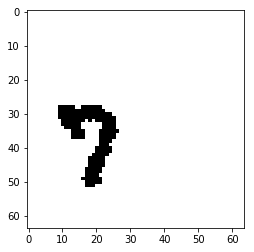

7


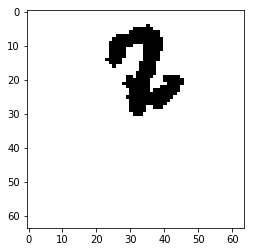

2


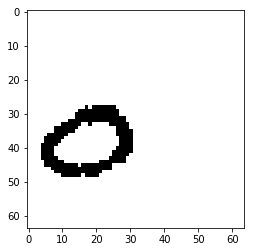

0


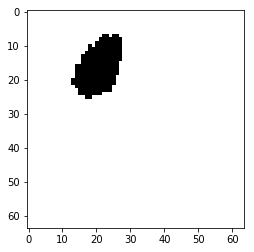

1


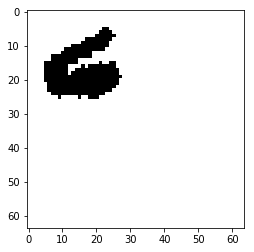

6


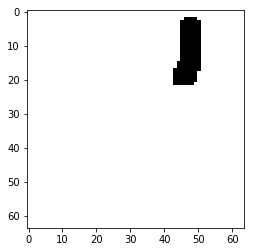

1


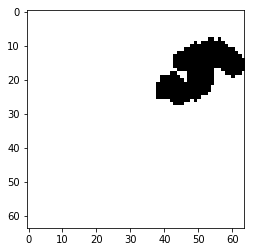

5


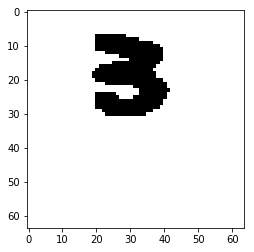

3


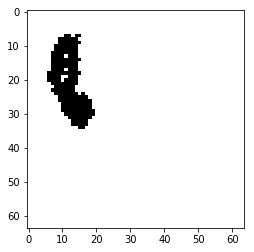

8


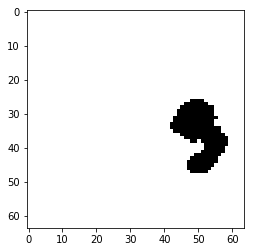

9


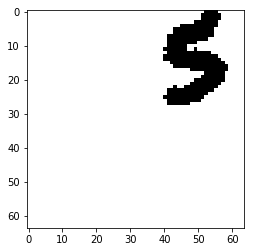

5


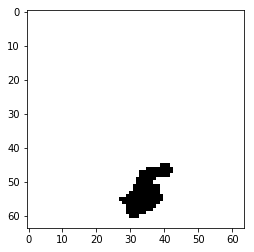

1


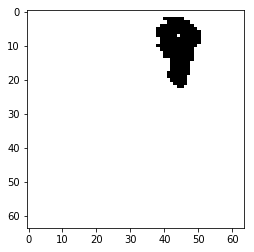

1


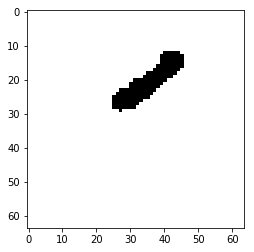

1


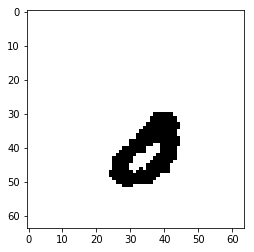

0


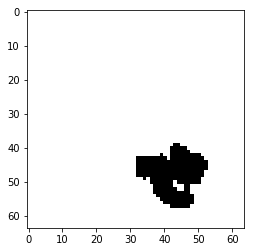

2


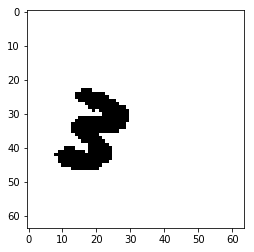

3


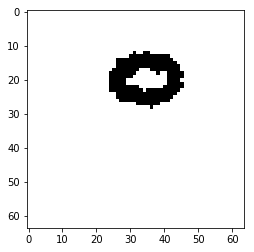

0


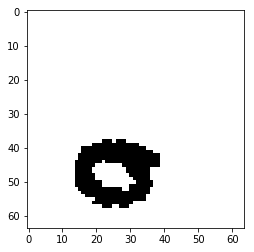

0


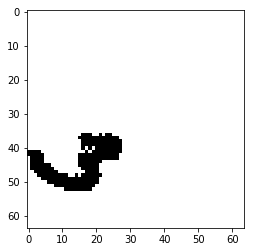

3


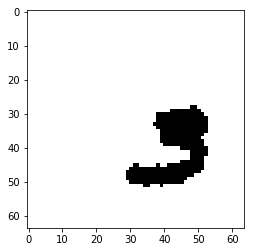

3


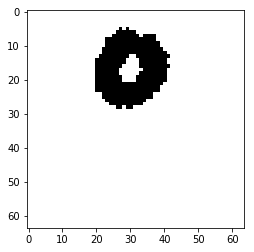

0


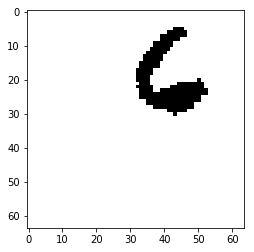

6


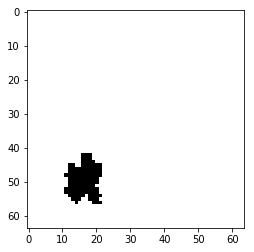

1


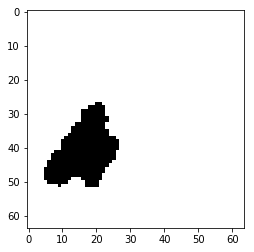

6


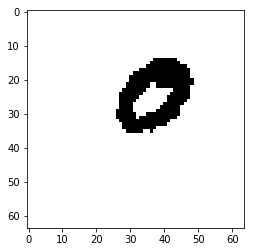

0


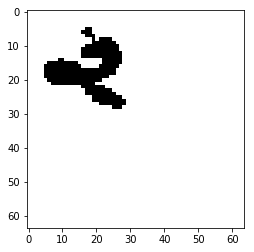

2


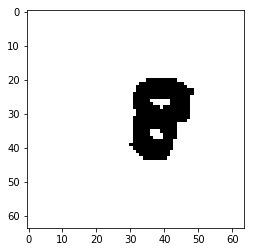

8


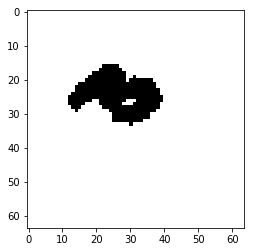

3


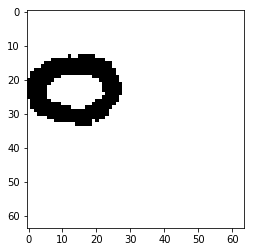

0


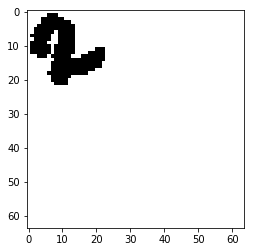

2


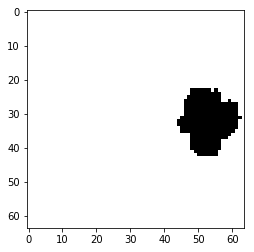

5


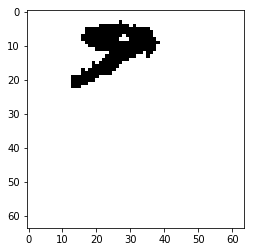

9


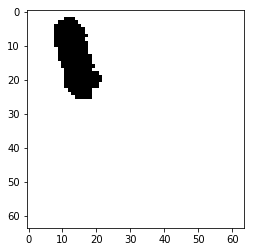

1


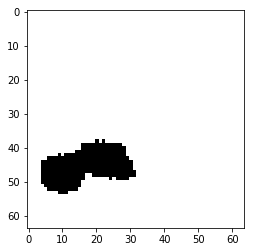

8


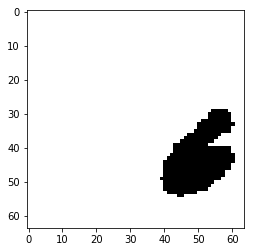

6


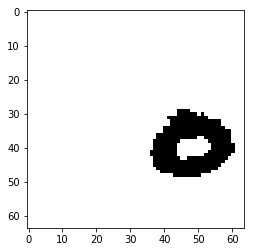

0


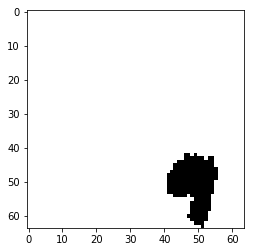

1


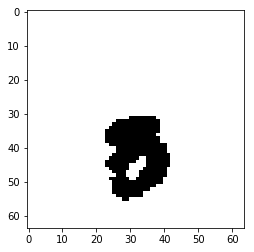

3


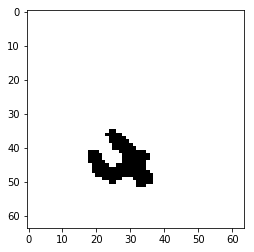

4


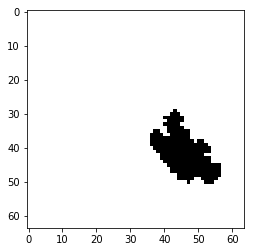

4


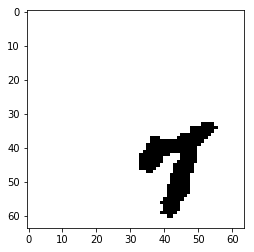

7


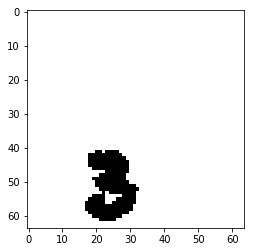

3


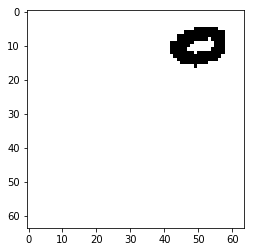

5


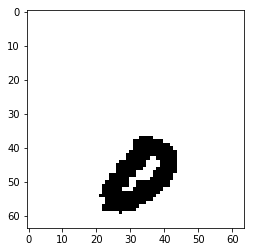

0


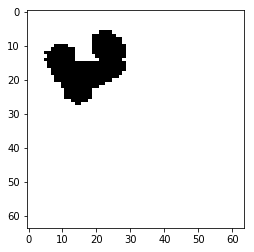

2


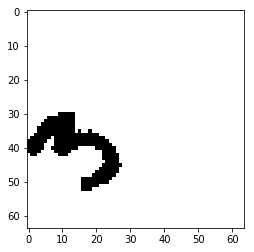

3


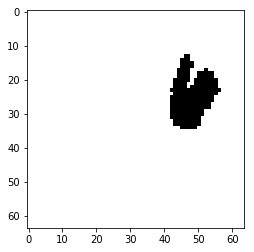

6


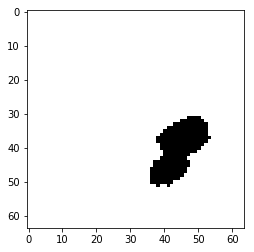

8


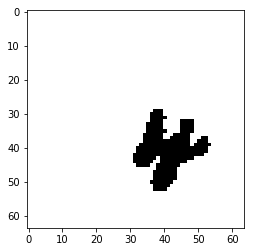

4


In [24]:
# this part shows a subset of test set and the prediction of the model. 
#Just to see how well the model performs
y_pred=model.predict(X2)
print y_pred.shape
y_pred=np.argmax(y_pred,axis=1)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
for i in range(50):
    img= X_test[i].reshape(64, 64)
    plt.imshow(img, cmap=plt.get_cmap('binary'))
    plt.show()
    print y_pred[i]   

In [25]:
import pandas as pd
i=range(0,10000)
my_df = pd.DataFrame(zip(i,y_pred), columns = ["Id", "Label"])
my_df.to_csv('submission.csv', index=False, header=True)
